# Artificial Neural Network

### Importing the libraries

In [78]:

import re
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.6.2


## Part 1 - Data Preprocessing

### Importing the dataset

In [79]:
dataset = pd.read_csv('../input/tracks/tracks2.csv')
#dataset = dataset.drop(dataset.columns[[0, 1, 5, 6, 7]], axis=1, inplace=True)
#dataset = df[df.columns.difference(['id', 'name', 'artists', 'id_artists', 'release_date'])]
#dataset.head()

In [80]:
dataset

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,72,153293,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,70,187601,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,58,142003,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [81]:
#X = dataset.iloc[:, 3:].values
#dataset2 = dataset[dataset.columns.difference(['popularity'])]

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

print("x is: ", X)
print("y is: ", y)

x is:  [[1.26903e+05 0.00000e+00 6.45000e-01 ... 1.27000e-01 1.04851e+02
  3.00000e+00]
 [9.82000e+04 0.00000e+00 6.95000e-01 ... 6.55000e-01 1.02009e+02
  1.00000e+00]
 [1.81640e+05 0.00000e+00 4.34000e-01 ... 4.57000e-01 1.30418e+02
  5.00000e+00]
 ...
 [1.87601e+05 0.00000e+00 5.35000e-01 ... 6.63000e-02 1.45095e+02
  4.00000e+00]
 [1.42003e+05 0.00000e+00 6.96000e-01 ... 4.38000e-01 9.00290e+01
  4.00000e+00]
 [2.14360e+05 0.00000e+00 6.86000e-01 ... 9.75000e-01 1.12204e+02
  4.00000e+00]]
y is:  [ 6  0  0 ... 70 58 38]


### Encoding categorical data

Label Encoding the "Gender" column

In [82]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nX[:, 2] = le.fit_transform(X[:, 2])\n'

In [83]:
print(X)

[[1.26903e+05 0.00000e+00 6.45000e-01 ... 1.27000e-01 1.04851e+02
  3.00000e+00]
 [9.82000e+04 0.00000e+00 6.95000e-01 ... 6.55000e-01 1.02009e+02
  1.00000e+00]
 [1.81640e+05 0.00000e+00 4.34000e-01 ... 4.57000e-01 1.30418e+02
  5.00000e+00]
 ...
 [1.87601e+05 0.00000e+00 5.35000e-01 ... 6.63000e-02 1.45095e+02
  4.00000e+00]
 [1.42003e+05 0.00000e+00 6.96000e-01 ... 4.38000e-01 9.00290e+01
  4.00000e+00]
 [2.14360e+05 0.00000e+00 6.86000e-01 ... 9.75000e-01 1.12204e+02
  4.00000e+00]]


One Hot Encoding the "Geography" column

### Splitting the dataset into the Training set and Test set

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [86]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [87]:
ann.add(tf.keras.layers.Dense(32, input_dim=14, activation='leaky_relu')) #must use REctifier act. func (RELU)

### Adding the second hidden layer

In [88]:
ann.add(tf.keras.layers.Dense(16, activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(6, activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(6, activation='leaky_relu'))
ann.add(tf.keras.layers.Dense(6, activation='leaky_relu'))

### Adding the output layer

In [89]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [90]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
ann.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_27 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 7         
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
____________________________________________________

### Training the ANN on the Training set

In [91]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs = 100)

Epoch 1/100
11734/11734 [==============================] - 33s 3ms/step - loss: 249.7547 - mae: 12.6702 - val_loss: 234.4391 - val_mae: 12.2695
Epoch 2/100
11734/11734 [==============================] - 34s 3ms/step - loss: 233.9071 - mae: 12.2566 - val_loss: 231.1672 - val_mae: 12.2437
Epoch 3/100
11734/11734 [==============================] - 33s 3ms/step - loss: 230.9626 - mae: 12.1492 - val_loss: 228.9715 - val_mae: 12.0823
Epoch 4/100
11734/11734 [==============================] - 34s 3ms/step - loss: 229.0169 - mae: 12.0697 - val_loss: 230.5255 - val_mae: 12.0408
Epoch 5/100
11734/11734 [==============================] - 34s 3ms/step - loss: 227.7367 - mae: 12.0171 - val_loss: 226.5786 - val_mae: 11.9064
Epoch 6/100
11734/11734 [==============================] - 34s 3ms/step - loss: 226.6651 - mae: 11.9764 - val_loss: 225.6616 - val_mae: 11.9221
Epoch 7/100
11734/11734 [==============================] - 34s 3ms/step - loss: 225.7203 - mae: 11.9310 - val_loss: 224.7369 - val_mae: 

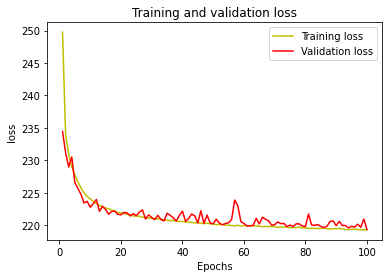

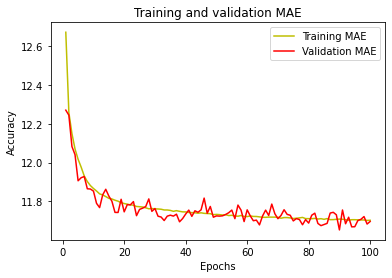

In [92]:
from matplotlib import pyplot as plt
#plot training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
#Predictions on test data
predictions = ann.predict(X_test[:30])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:30])

Predicted values are:  [[42.217594]
 [15.61467 ]
 [15.011114]
 [13.713189]
 [20.236778]
 [37.715847]
 [27.29359 ]
 [33.658073]
 [16.70419 ]
 [40.6663  ]
 [37.3438  ]
 [17.648705]
 [28.290634]
 [44.176643]
 [39.908073]
 [20.14864 ]
 [32.051365]
 [28.62469 ]
 [39.229702]
 [22.975803]
 [42.58671 ]
 [33.8809  ]
 [28.496101]
 [14.645177]
 [37.23142 ]
 [36.373524]
 [28.500937]
 [25.526018]
 [17.622381]
 [23.36901 ]]
Real values are:  [45 13  0  4 35 45 32 25 10 46 54 14 37 37 47 26 29 13  0 10 29 24 35 14
 23 33 35  9 22 18]


In [94]:
#compare with other models see which is better
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#comparison with other models
#neural network of this code (this model)
mse_neural, mae_neural = ann.evaluate(X_test, y_test)
print('Mean Squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


## linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean Squared error from neural net: ', mse_lr)
print('Mean absolute error from neural net: ', mae_lr)


## Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean Squared error from decision tree: ', mse_dt)
print('Mean absolute error from decision tree: ', mae_dt)


##Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state=30)
model.fit(X_train, y_train)

y_pred_RF = model.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean Squared error from Random Forest: ', mse_RF)
print('Mean absolute error from Random Forest: ', mae_RF)


3667/3667 [==============================] - 6s 2ms/step - loss: 220.1804 - mae: 11.7284
Mean Squared error from neural net:  220.18043518066406
Mean absolute error from neural net:  11.728353500366211
Mean Squared error from neural net:  260.5632703464653
Mean absolute error from neural net:  13.11167890901327
Mean Squared error from decision tree:  414.6164175123252
Mean absolute error from decision tree:  15.506255724489062
Mean Squared error from Random Forest:  226.7518804633883
Mean absolute error from Random Forest:  11.775734148342227
